In [ ]:
!pip install numdifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd

In [ ]:
z1 = np.random.normal(size=2)
z2 = np.random.normal(size=2)
z3 = np.random.normal(size=2)
z4 = np.random.normal(size=2)
z5 = np.random.normal(size=2)

In [ ]:
Z = np.array([z1, z2, z3, z4, z5])
print(Z.shape)
Z

(5, 2)


array([[ 1.53898408,  1.47583787],
       [ 1.00446603,  0.50987426],
       [ 0.47772112,  0.34402684],
       [ 0.10619977, -1.83165512],
       [-0.97961619,  1.95418353]])

In [ ]:
M = Z @ Z.T
M

array([[ 4.54656942,  2.29834896,  1.24293304, -2.53978624,  1.37644435],
       [ 2.29834896,  1.26892376,  0.65526506, -0.82723973,  0.01239669],
       [ 1.24293304,  0.65526506,  0.34657194, -0.57940465,  0.20430825],
       [-2.53978624, -0.82723973, -0.57940465,  3.36623888, -3.6834253 ],
       [ 1.37644435,  0.01239669,  0.20430825, -3.6834253 ,  4.77848116]])

In [ ]:
w1 = np.random.normal(size=3)
w2 = np.random.normal(size=3)
w3 = np.random.normal(size=3)
w4 = np.random.normal(size=3)
w5 = np.random.normal(size=3)

W = np.array([w1, w2, w3, w4, w5])
print(W.shape)
W

(5, 3)


array([[-0.6423386 , -0.79555948, -0.25191102],
       [-0.11299779,  0.51696491, -0.57999136],
       [ 0.71775878,  0.05363664, -0.16644982],
       [-0.28616721, -0.33768381, -0.23169902],
       [ 0.44435586, -1.19021992,  1.28086255]])

In [ ]:
zeros = np.zeros(5).reshape((5,1))
X0 = np.append(Z, zeros, axis=1)
print(X0.shape)
X0

(5, 3)


array([[ 1.53898408,  1.47583787,  0.        ],
       [ 1.00446603,  0.50987426,  0.        ],
       [ 0.47772112,  0.34402684,  0.        ],
       [ 0.10619977, -1.83165512,  0.        ],
       [-0.97961619,  1.95418353,  0.        ]])

In [ ]:
X0 = X0 + W
X0

array([[ 0.89664547,  0.6802784 , -0.25191102],
       [ 0.89146824,  1.02683917, -0.57999136],
       [ 1.1954799 ,  0.39766349, -0.16644982],
       [-0.17996743, -2.16933893, -0.23169902],
       [-0.53526034,  0.76396361,  1.28086255]])

In [ ]:
def f(X):
  return np.linalg.norm((X @ X.T) - M) ** 2

def grad_f(X):
  return 2 * (X@X.T - M)@X + 2 * (X@X.T + -M.T)@X

In [ ]:
errorBound = 10**-8
X = X0
a = 2 * 10**-4
PrecGD_iterates = []
PrecGD_functionValues = []

while f(X) > errorBound:
  PrecGD_iterates.append(X)
  PrecGD_functionValues.append(f(X))
  eta = np.sqrt(f(X))
  X = X - (a * grad_f(X).reshape((5,3))) @ np.linalg.inv((X.T @ X + eta * np.eye(3)))

PrecGD_iterates.append(X)
PrecGD_functionValues.append(f(X))

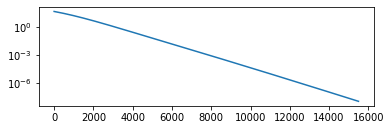

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
plt.plot(PrecGD_functionValues)
ax.set_yscale('log')
plt.show()

In [ ]:
errorBound = 10**-8
X = X0
a = 2 * 10**-4
PrecGD_max_iterates = []
PrecGD_max_functionValues = []

while f(X) > errorBound:
  PrecGD_max_iterates.append(X)
  PrecGD_max_functionValues.append(f(X))
  eta = max(f(X), f(X)**(1/4))
  X = X - (a * grad_f(X).reshape((5,3))) @ np.linalg.inv((X.T @ X + eta * np.eye(3)))

PrecGD_max_iterates.append(X)
PrecGD_max_functionValues.append(f(X))

In [ ]:
errorBound = 10**-8
X = X0
a = 2 * 10**-4
PrecGD_min_iterates = []
PrecGD_min_functionValues = []

while f(X) > errorBound:
  PrecGD_min_iterates.append(X)
  PrecGD_min_functionValues.append(f(X))
  eta = min(f(X), f(X)**(1/4))
  X = X - (a * grad_f(X).reshape((5,3))) @ np.linalg.inv((X.T @ X + eta * np.eye(3)))

PrecGD_min_iterates.append(X)
PrecGD_min_functionValues.append(f(X))

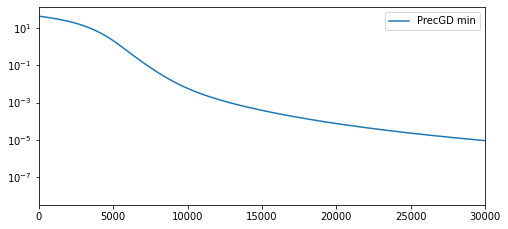

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2,1,1)
plt.plot(PrecGD_min_functionValues, label="PrecGD min")
plt.legend()
ax.set_yscale('log')
plt.xlim([0,30000])
plt.show()

In [ ]:
errorBound = 10**-8
X = X0
a = 2 * 10**-4
GD_iterates = []
GD_functionValues = []

while f(X) > errorBound:
  GD_iterates.append(X)
  GD_functionValues.append(f(X))
  X = X - a * grad_f(X)

GD_iterates.append(X)
GD_functionValues.append(f(X))

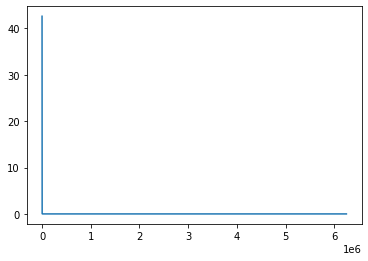

In [ ]:
plt.plot(GD_functionValues)

In [ ]:
errorBound = 10**-8
X = X0
a = 2 * 10**-2
ScaledGD_iterates = []
ScaledGD_functionValues = []

while f(X) > errorBound:
  ScaledGD_iterates.append(X)
  ScaledGD_functionValues.append(f(X))
  X = X - a * grad_f(X) @ np.linalg.inv(X.T @ X)

ScaledGD_iterates.append(X)
ScaledGD_functionValues.append(f(X))

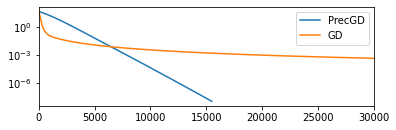

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
plt.plot(PrecGD_functionValues, label="PrecGD")
plt.plot(GD_functionValues, label="GD")
plt.legend()
ax.set_yscale('log')
plt.xlim([0,30000])
plt.show()

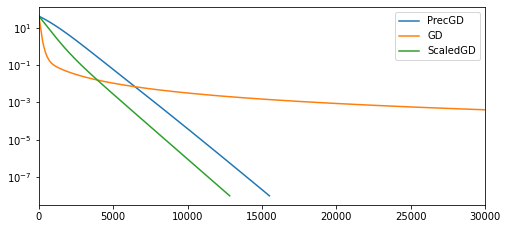

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2,1,1)
plt.plot(PrecGD_functionValues, label="PrecGD")
plt.plot(GD_functionValues, label="GD")
plt.plot(ScaledGD_functionValues, label="ScaledGD")
plt.legend()
ax.set_yscale('log')
plt.xlim([0,30000])
plt.show()

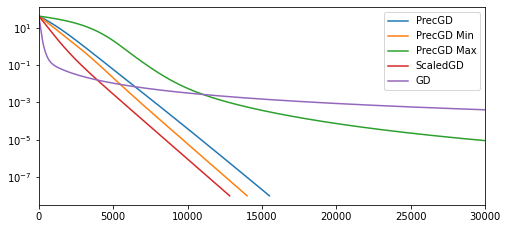

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2,1,1)
plt.plot(PrecGD_functionValues, label="PrecGD")
plt.plot(PrecGD_min_functionValues, label="PrecGD Min")
plt.plot(PrecGD_max_functionValues, label="PrecGD Max")
plt.plot(ScaledGD_functionValues, label="ScaledGD")
plt.plot(GD_functionValues, label="GD")
plt.xlim([0,30000])
plt.legend()
ax.set_yscale('log')
plt.show()